In [24]:
### PARTE 01 ###

In [25]:
### 1.   Limpeza e Análise de Dados de Vendas

In [26]:
import pandas as pd
import numpy as np
from faker import Faker
import random
from datetime import datetime

In [27]:
fake = Faker()
Faker.seed(1)
random.seed(1)

In [ ]:
# Função para gerar o dataset
def gerar_dados(num_registros):
    
    produto = ["Produto A", "Produto B", "Produto C", "Produto D", "Produto E", "Produto F"]
    categoria = ["Categoria 1", "Categoria 2", "Categoria 3", "Categoria 4"]

    data = {
        "ID": range(1, num_registros + 1),
        "Data": [fake.date_between_dates(date_start = datetime(2023, 1, 1), date_end = datetime(2023, 12, 31)) 
                 for _ in range(num_registros)],
        "Produto": [random.choice(produto) 
                    for _ in range(num_registros)],
        "Categoria": [random.choice(categoria) 
                      for _ in range(num_registros)],
        "Quantidade": np.random.randint(1, 50, num_registros),
        "Preco": np.random.uniform(10.0, 1000.0, num_registros).round(2)
    }
    df = pd.DataFrame(data)
    return df

In [29]:
# Dataset com 100 registros
df = gerar_dados(100)
print("Dataset Original:")
display(df)

Dataset Original:


,ID,Data,Produto,Categoria,Quantidade,Preco
0,1,2023-02-22,Produto B,Categoria 1,20,677.29
1,2,2023-08-10,Produto E,Categoria 4,10,242.94
2,3,2023-11-26,Produto A,Categoria 1,25,526.00
3,4,2023-11-08,Produto C,Categoria 3,33,964.11
4,5,2023-10-24,Produto A,Categoria 4,30,797.81
...,...,...,...,...,...,...
95,96,2023-12-09,Produto B,Categoria 1,21,188.72
96,97,2023-07-13,Produto E,Categoria 3,21,64.99
97,98,2023-11-25,Produto D,Categoria 1,30,400.48
98,99,2023-07-16,Produto C,Categoria 1,25,164.95


In [30]:
df.dtypes

ID              int64
Data           object
Produto        object
Categoria      object
Quantidade      int32
Preco         float64
dtype: object

In [31]:
# Conversão de tipos de dados
df["Data"] = pd.to_datetime(df["Data"])

In [32]:
df.dtypes

ID                     int64
Data          datetime64[ns]
Produto               object
Categoria             object
Quantidade             int32
Preco                float64
dtype: object

In [33]:
print("Dataset Limpo:")
display(df)

Dataset Limpo:


,ID,Data,Produto,Categoria,Quantidade,Preco
0,1,2023-02-22,Produto B,Categoria 1,20,677.29
1,2,2023-08-10,Produto E,Categoria 4,10,242.94
2,3,2023-11-26,Produto A,Categoria 1,25,526.00
3,4,2023-11-08,Produto C,Categoria 3,33,964.11
4,5,2023-10-24,Produto A,Categoria 4,30,797.81
...,...,...,...,...,...,...
95,96,2023-12-09,Produto B,Categoria 1,21,188.72
96,97,2023-07-13,Produto E,Categoria 3,21,64.99
97,98,2023-11-25,Produto D,Categoria 1,30,400.48
98,99,2023-07-16,Produto C,Categoria 1,25,164.95


In [34]:
# Salvando o dataset limpo
df.to_csv("data_clean.csv", index = False)

In [ ]:
# Cáculos
# Total de Vendas por Produto
df["Total_Vendas"] = df["Quantidade"] * df["Preco"]
vendas_por_produto = df.groupby("Produto")["Total_Vendas"].sum().reset_index()

print("Total de Vendas por Produto:")
display(vendas_por_produto)

# Produto com Maior Número de Vendas Totais
produto_top_vendas = vendas_por_produto.loc[vendas_por_produto["Total_Vendas"].idxmax()]

print("\nProduto com Maior Número de Vendas Totais:")
print(produto_top_vendas)

df.to_csv("data_tratado.csv", index = False)

Total de Vendas por Produto:


,Produto,Total_Vendas
0,Produto A,231220.45
1,Produto B,127464.28
2,Produto C,174354.22
3,Produto D,215389.22
4,Produto E,168989.19
5,Produto F,213065.39



Produto com Maior Número de Vendas Totais:
Produto         Produto A
Total_Vendas    231220.45
Name: 0, dtype: object


In [ ]:
# Cáculos
# Total de Vendas por Produto
df["Total_Vendas"] = df["Quantidade"] * df["Preco"]
vendas_por_produto = df.groupby("Produto")["Total_Vendas"].sum().reset_index()

print("Total de Vendas por Produto:")
display(vendas_por_produto)

# Produto com Maior Número de Vendas Totais
produto_top_vendas = vendas_por_produto.loc[vendas_por_produto["Total_Vendas"].idxmax()]

print("\nProduto com Maior Número de Vendas Totais:")
print(produto_top_vendas)

Total de Vendas por Produto:


,Produto,Total_Vendas
0,Produto A,231220.45
1,Produto B,127464.28
2,Produto C,174354.22
3,Produto D,215389.22
4,Produto E,168989.19
5,Produto F,213065.39



Produto com Maior Número de Vendas Totais:
Produto         Produto A
Total_Vendas    231220.45
Name: 0, dtype: object


In [36]:
### 2.   Análise Exploratória de Dados de Vendas

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Total de vendas por mês
df['Mes'] = df['Data'].dt.to_period('M').astype(str)
vendas_mensais = df.groupby('Mes')['Total_Vendas'].sum().reset_index()


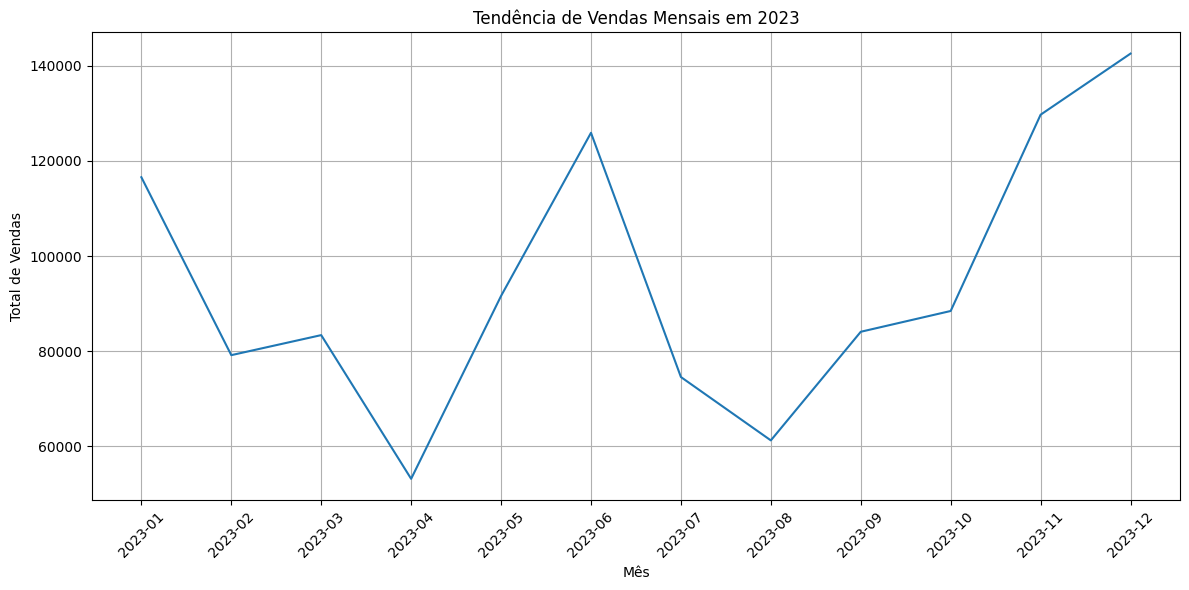

In [39]:
# Gráfico de linha para tendência de vendas mensais
plt.figure(figsize=(12, 6))
sns.lineplot(data = vendas_mensais, x = 'Mes', y = 'Total_Vendas')
plt.title('Tendência de Vendas Mensais em 2023')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.grid()
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [40]:
# Insights/Padrões

# Pico de venda
pico_venda = vendas_mensais[vendas_mensais['Total_Vendas'] == vendas_mensais['Total_Vendas'].max()]
print("Picos de Vendas Mensais:")
display(pico_venda)

# Meses com Vendas Acima da Média
media_vendas_mensais = vendas_mensais['Total_Vendas'].mean()
meses_acima_media = vendas_mensais[vendas_mensais['Total_Vendas'] > media_vendas_mensais]
print("\nMeses com Vendas Acima da Média:")
display(meses_acima_media)

# Quantidade de vendas por produto
quantidade_por_produto = df.groupby("Produto")["Quantidade"].sum().reset_index()
print("\nQuantidade de vendas por produto")
display(quantidade_por_produto)

# Produto com a maior quantidade de vendas
produto_top_quantidade = quantidade_por_produto.loc[quantidade_por_produto["Quantidade"].idxmax()]

print("\nProduto com a maior quantidade de vendas:")
print(produto_top_quantidade)

Picos de Vendas Mensais:


,Mes,Total_Vendas
11,2023-12,142539.22



Meses com Vendas Acima da Média:


,Mes,Total_Vendas
0,2023-01,116563.23
5,2023-06,125895.73
10,2023-11,129701.85
11,2023-12,142539.22



Quantidade de vendas por produto


,Produto,Quantidade
0,Produto A,441
1,Produto B,246
2,Produto C,321
3,Produto D,539
4,Produto E,368
5,Produto F,533



Produto com a maior quantidade de vendas:
Produto       Produto D
Quantidade          539
Name: 3, dtype: object


In [41]:
### PARTE 02 ###

In [ ]:
from pandasql import sqldf




In [43]:
consulta = lambda q: sqldf(q, globals())

In [44]:
query1 = '''
-- Selecionar as colunas Produto, Categoria e Total_Vendas dos dados df
SELECT Produto, Categoria, Total_Vendas FROM df

-- Ordernar a coluna Total de vendas em ordem descercente
ORDER BY Total_Vendas DESC
'''

resultado = consulta(query1)
display(resultado)

,Produto,Categoria,Total_Vendas
0,Produto C,Categoria 2,35460.00
1,Produto C,Categoria 3,31815.63
2,Produto E,Categoria 4,31491.81
3,Produto A,Categoria 4,29401.20
4,Produto F,Categoria 1,28702.50
...,...,...,...
95,Produto C,Categoria 4,714.24
96,Produto D,Categoria 1,513.60
97,Produto F,Categoria 3,511.60
98,Produto D,Categoria 1,484.20


In [45]:
query2 = '''
-- Selecionar as colunas Produto, Mes e Total_Vendas dos dados df:
SELECT Produto, Mes, Total_Vendas FROM df

-- Filtrar o mês de junho:
WHERE Mes = '2023-06'

-- Ordenar a coluna Total_Vendas em ordem crescente:
ORDER BY Total_Vendas ASC
'''

resultado = consulta(query2)
# Considerei as 3 menores vendas para desmonstrar
print("Os produtores com as menores vendas, sendo demonstrados as 5 menores vendas:")
display(resultado.head(3))

Os produtores com as menores vendas, sendo demonstrados as 5 menores vendas:


,Produto,Mes,Total_Vendas
0,Produto B,2023-06,1210.95
1,Produto B,2023-06,3758.36
2,Produto F,2023-06,5935.02


In [46]:
# Consultas SQL para salvar
consultas_sql = '''
-- Consulta 1:

-- Selecionar as colunas Produto, Categoria e Total_Vendas dos dados df
SELECT Produto, Categoria, Total_Vendas FROM df

-- Ordernar a coluna Total de vendas em ordem descercente
ORDER BY Total_Vendas DESC

-- Consulta 2: 

-- Selecionar as colunas Produto, Mes e Total_Vendas dos dados df:
SELECT Produto, Mes, Total_Vendas FROM df

-- Filtrar o mes de junho:
WHERE Mes = '2023-06'

-- Ordenar a coluna Total_Vendas em ordem crescente:
ORDER BY Total_Vendas ASC
'''
# Salvar as consultas
with open('consultas_sql.sql', 'w') as file:
    file.write(consultas_sql)